In [1]:
import tables as tb
import pandas as pd
from glob import glob
import re
import os
from invisible_cities.core  .configure import configure
import sys
import math
import invisible_cities.io.dst_io as dio
from invisible_cities.io.table_io import make_table
from invisible_cities.cities.components import index_tables

import numpy as np

In [2]:
filesin = glob(os.path.expandvars('h5files/Tl208_NEW_v1_03_01_nexus_v5_03_04_cut5*.beersheba_label_4mm.h5'))

In [3]:
file = filesin[0]

In [4]:
with tb.open_file(file, 'r') as h5in:
    print(h5in)

h5files/Tl208_NEW_v1_03_01_nexus_v5_03_04_cut50.beersheba_label_4mm.h5 (File) ''
Last modif.: 'Mon Mar  7 17:17:06 2022'
Object Tree: 
/ (RootGroup) ''
/DATASET (Group) ''
/DATASET/BeershebaVoxels (Table(488124,), shuffle, zlib(4)) ''
/DATASET/BinsInfo (Table(1,), shuffle, zlib(4)) ''
/DATASET/EventsInfo (Table(2420,), shuffle, zlib(4)) ''
/DATASET/IsauraInfo (Table(3482,), shuffle, zlib(4)) ''
/DATASET/MCHits (Table(601302,), shuffle, zlib(4)) ''
/DATASET/MCVoxels (Table(131190,), shuffle, zlib(4)) ''



In [5]:
dio.load_dst(file, 'DATASET', 'MCHits')

,x,y,z,hit_id,particle_id,energy,segclass,binclass,dist_hits,cumdist,particle_name,creator_proc,group_ener,small_b,dataset_id
0,19.342644,71.088623,340.406860,0,8,0.000068,1.0,0,0.000000,0.000000,gamma,RadioactiveDecay,0.000068,False,0
1,19.588364,70.130447,340.525208,0,10,0.004881,2.0,0,0.000000,0.000000,e-,compt,0.846085,False,0
2,19.804770,69.213310,340.820129,1,10,0.004572,2.0,0,0.987396,0.987396,e-,compt,0.846085,False,0
3,20.122801,68.309631,341.089294,2,10,0.001257,2.0,0,0.995103,1.982499,e-,compt,0.846085,False,0
4,20.507402,67.444038,341.376343,3,10,0.003188,2.0,0,0.989730,2.972229,e-,compt,0.846085,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601297,22.466122,-147.897827,153.250839,1,22,0.009895,1.0,0,0.000000,0.000000,e-,eIoni,0.052238,False,2419
601298,22.441330,-147.921585,153.316025,2,22,0.007346,1.0,0,0.000000,0.000000,e-,eIoni,0.052238,False,2419
601299,22.448475,-147.960434,153.288620,3,22,0.006945,1.0,0,0.000000,0.000000,e-,eIoni,0.052238,False,2419
601300,22.473255,-147.952438,153.298874,4,22,0.010365,1.0,0,0.000000,0.000000,e-,eIoni,0.052238,False,2419


In [6]:
isaura_info = dio.load_dst(file, 'DATASET', 'IsauraInfo')

In [7]:
beersh_voxels = dio.load_dst(file, 'DATASET', 'BeershebaVoxels')

In [8]:
beersh_voxels

,xbin,ybin,zbin,energy,binclass,MC_ener,ratio,segclass,dataset_id,elem_ener,elem,elem_count,cloud_ener,cloud,cloud_count,blob_success,nblob
0,33,51,85,0.000381,0,NaN,NaN,4,0,0.018355,1_2,5.0,0.018355,c_1,2.0,True,1
1,33,52,85,0.000346,0,NaN,NaN,4,0,0.018355,1_2,5.0,0.018355,c_1,2.0,True,1
2,34,51,85,0.006206,0,0.034544,1.0,1,0,0.018355,1_2,5.0,0.018355,c_1,2.0,True,1
3,34,51,86,0.001047,0,NaN,NaN,4,0,0.018355,1_2,5.0,0.018355,c_1,2.0,True,1
4,34,52,85,0.003633,0,NaN,NaN,4,0,0.018355,1_2,5.0,0.018355,c_1,2.0,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488119,60,17,30,0.003334,0,0.002775,1.0,2,2419,1.043237,2_0,1.0,1.655464,c_0,2.0,True,1
488120,61,16,29,0.002621,0,NaN,NaN,5,2419,1.043237,2_0,1.0,1.655464,c_0,2.0,True,1
488121,61,16,30,0.001723,0,NaN,NaN,5,2419,1.043237,2_0,1.0,1.655464,c_0,2.0,True,1
488122,61,17,29,0.000170,0,NaN,NaN,5,2419,1.043237,2_0,1.0,1.655464,c_0,2.0,True,1


In [9]:
events_info = dio.load_dst(file, 'DATASET', 'EventsInfo')

In [10]:
bins_info = dio.load_dst(file, 'DATASET', 'BinsInfo')

In [11]:
bins_info

,min_x,total_x,size_x,max_x,nbins_x,min_y,total_y,size_y,max_y,nbins_y,min_z,total_z,size_z,max_z,nbins_z,Rmax,loss_th,ener_th,sb_th
0,-220.0,440.0,5.0,220.0,89.0,-220.0,440.0,5.0,220.0,89.0,1.0,548.0,4.0,549.0,138.0,198.0,0.25,NaN,1.5


In [5]:
def bin_creator(bins_info):
    '''
    This function creates the bins for each coordinate from the BinsInfo table in our data.
    '''
    
    min_x, max_x, nbins_x = bins_info.min_x.values[0], bins_info.max_x.values[0], int(bins_info.nbins_x.values[0])
    min_y, max_y, nbins_y = bins_info.min_y.values[0], bins_info.max_y.values[0], int(bins_info.nbins_y.values[0])
    min_z, max_z, nbins_z = bins_info.min_z.values[0], bins_info.max_z.values[0], int(bins_info.nbins_z.values[0])
    
    bins_x = np.linspace(min_x, max_x, nbins_x)
    bins_y = np.linspace(min_y, max_y, nbins_y)
    bins_z = np.linspace(min_z, max_z, nbins_z)
    
    return bins_x, bins_y, bins_z

In [13]:
bins_x, bins_y, bins_z = bin_creator(bins_info)

In [14]:
#blob1_xbin = pd.cut(isaura_info.blob1_x, bins_x, labels = np.arange(0, len(bins_x)-1)).astype(int)
#blob1_ybin = pd.cut(isaura_info.blob1_y, bins_y, labels = np.arange(0, len(bins_y)-1)).astype(int)
#blob1_zbin = pd.cut(isaura_info.blob1_z, bins_z, labels = np.arange(0, len(bins_z)-1)).astype(int)

#blob2_xbin = pd.cut(isaura_info.blob2_x, bins_x, labels = np.arange(0, len(bins_x)-1)).astype(int)
#blob2_ybin = pd.cut(isaura_info.blob2_y, bins_y, labels = np.arange(0, len(bins_y)-1)).astype(int)
#blob2_zbin = pd.cut(isaura_info.blob2_z, bins_z, labels = np.arange(0, len(bins_z)-1)).fillna(0).astype(int)
#EL FILLNA(0) ES UNA SOLUCIÓN TEMPORAL MIENTRAS NO SE HACE LA PRODUCCIÓN

Quitar lo de astype(int) y mirar para cada set de voxeles los casos en los que hay algun NaN, y si hay mirar que coordenada es y meterlo en el voxel más cercano y PISTA no?? No es tan sencillo pero weno

En x e y no va a pasar ya que cubre todo el espacio, solo puede pasar en z que deja fuera un par de mm... y esto me hace pensar... qué tiene más sentido, dejar fuera ese par de mm o añadir un par de mm al volumen, SABIENDO que aunque un voxel q tiene parte fuera esté lleno, realmente sólo hay chicha en la parte de dentro del detector... tampoco es tan drástico... 

BUENO definitivamente decidí aumentar el binado para que todos los hits cupieran dentro, ROLLO PONER EN Z [0, 552] PARA QUE PUDIERA VOXELIZAR EN TAMAÑO 4, PERO EL ULTIMO VOXEL [548, 552] SÓLO TENDRÁ HITS EN SU MITAD, ALGO QUE PIENSO QUE NO NOS IMPORTA MUCHO NO? ROLLO SON MUY POCOS CASOS Y EN LOS QUE SON, TAMPOCO ES QUE VAYA A SER UNA LOCURA... ERA ESO O DEJARLO FUERA, Y REALMENTE ME DA IGUAL DEJARLO FUERA PERO LUEGO ISAURA Q?? A NO SER Q LE APLIQUE TB UN HITS_DATA_CUT

Vale lo anterior es obvio q se puede hacer porque pensemoslo así: en xy el detector es cilindrico de radio 200mm; sin embargo nosotros tenemos una voxelización de [-220, 220], aplicando un corte en radio a los hits de 200mm... eso hace q no haya hits fuera del cilindro (ya no los iba a haber) PERO al mismo tiempo, algunos voxeles del grid xy FORZADAMENTE van a salirse si resulta que hay algún hit en ellos!!!

Tengo varios criterios para ''clasificar'' cada traza:

* BINCLASS: la True MC info
* ISAU_BINCLASS: nos dice si una traza es señal o no según un threshold en la energía del blob2; viene del análisis de las trazas de isaura.
* COINCIDENCE_BINCLASS: puedo elaborar una tercera binclass en la que si el blob1_seg se llena y el blob2_seg no lo tomamos como fondo, si los dos parámetros se llenan lo tomamos como señal
* LABEL_BINCLASS: podemos tomar la fila en la que contamos blobs de beersheba para decir vale, este evento de labelling DIO BIEN en número de blobs y eso (q va a ser la mayoría que yo tenía bastante buena success rate)

Añadimmos True MC BINCLASS

In [15]:
binclass_isaura = isaura_info.merge(events_info[['dataset_id', 'binclass']], on = 'dataset_id')

A ver, isaura tiene por evento cierto número de trazas identificadas (entiendo que son grupos de voxeles como los que hice yo) y por cada traza tiene identificados dos blobs.

Primero tendré que agregar a la información de isaura pues la info de binclass, para así saber cuántos blobs de los que tiene cada traza de isaura tienen que coincidir con voxeles etiquetados

Voxelizamos los blobs de isaura

In [6]:
def voxelize_isaura_blobs(isaura_info, bins):
    '''
    bins es [bins_x, bins_y, bins_z]
    
    THE FILLNA SHOULD BE AVOIDED...
    '''
    for colname, bi in zip(isaura_info.columns[26:32], bins * 2):
        isaura_bin = pd.cut(isaura_info[colname], bi, labels = np.arange(0, len(bi)-1)).fillna(0).astype(int)
        isaura_info = isaura_info.assign(**{colname + 'bin' : isaura_bin})
        
    return isaura_info

In [17]:
bins = [bins_x, bins_y, bins_z]

In [18]:
isaura_voxels = voxelize_isaura_blobs(binclass_isaura, bins)

Cogemos los voxeles sólo de blob de los datos de beersheba


Hago un merge de las coordenadas de blob1 en isaura con los voxeles del DF de blob voxels, dropeo las columnas repetidas y renombro segclass y elem para identificar que es la segclass y elem del blob1, repito con blob2

Identificamos los blobs de isaura con ALGUNO de los voxeles blob de beersheba

Buscamos ahora la COINCIDENCE_BINCLASS

In [19]:
blob_voxels = beersh_voxels[['dataset_id', 'xbin', 'ybin', 'zbin', 'segclass', 'elem']][np.isin(beersh_voxels.segclass, [3,6])]



In [20]:
blob_voxels

,dataset_id,xbin,ybin,zbin,segclass,elem
10,0,38,55,101,6,3_0
11,0,38,56,101,6,3_0
12,0,39,53,101,6,3_0
13,0,39,54,101,6,3_0
14,0,39,55,100,6,3_0
...,...,...,...,...,...,...
487949,2419,47,12,38,6,3_0
487950,2419,47,12,39,6,3_0
487954,2419,47,13,38,3,3_0
487955,2419,47,13,39,6,3_0


In [21]:
bins_size = bins_info.size_x.values[0], bins_info.size_y.values[0], bins_info.size_z.values[0]

In [22]:
bins_info

,min_x,total_x,size_x,max_x,nbins_x,min_y,total_y,size_y,max_y,nbins_y,min_z,total_z,size_z,max_z,nbins_z,Rmax,loss_th,ener_th,sb_th
0,-220.0,440.0,5.0,220.0,89.0,-220.0,440.0,5.0,220.0,89.0,1.0,548.0,4.0,549.0,138.0,198.0,0.25,NaN,1.5


In [23]:
isaura_voxels

,dataset_id,event,trackID,energy,length,numb_of_voxels,numb_of_hits,numb_of_tracks,x_min,y_min,...,vox_size_x,vox_size_y,vox_size_z,binclass,blob1_xbin,blob1_ybin,blob1_zbin,blob2_xbin,blob2_ybin,blob2_zbin
0,0,100000050,0,1.431453,83.407169,23,3437,2,-22.5,50.5,...,15.0,15.0,15.0,0,40,55,101,48,57,86
1,0,100000050,1,0.018355,0.000000,1,66,2,-50.5,37.5,...,15.0,15.0,15.0,0,34,51,85,34,51,85
2,1,100000051,0,1.632143,62.193966,24,3368,1,-37.5,33.5,...,15.0,15.0,15.0,0,37,52,19,44,60,23
3,2,100000052,0,1.039822,66.213203,21,2558,2,-10.5,-185.5,...,15.0,15.0,15.0,0,45,17,27,44,7,22
4,2,100000052,1,0.670655,36.213203,5,1670,2,-74.5,-42.5,...,15.0,15.0,15.0,0,30,36,38,33,42,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3477,2416,100000592,0,1.681832,133.174728,33,3476,1,31.5,62.5,...,15.0,15.0,15.0,0,51,57,55,65,64,70
3478,2417,100000593,0,1.632925,104.620372,20,3675,2,-28.5,40.5,...,15.0,15.0,15.0,0,54,53,82,39,58,76
3479,2417,100000593,1,0.081796,21.213203,2,231,2,32.5,136.5,...,15.0,15.0,15.0,0,52,72,43,53,71,43
3480,2418,100000594,0,1.561276,124.387931,30,3820,1,-148.5,93.5,...,15.0,15.0,15.0,0,15,71,62,31,71,73


In [7]:
def blob_sphere_radius(bins_info, radius):
    bins_size = bins_info.size_x.values[0], bins_info.size_y.values[0], bins_info.size_z.values[0]
    scaled_radius = [int(np.ceil(radius/size)) for size in bins_size]
    return scaled_radius

In [25]:
scaled_radius = blob_sphere_radius(bins_info, 21)

In [8]:
def identify_sphere_voxels(isaura_voxels, 
                           blob_voxels,
                           scaled_radius, 
                           coord_names, 
                           center_names, 
                           blob_segname, 
                           blob_elename):
    '''
    Gets the closest blob voxel inside an sphere of certain radius centered in an isaura blob
    '''
    #get all the possible sphere centres form the blobs that didn't match any segclass blob
    center_voxels = isaura_voxels[isaura_voxels[blob_segname].isnull()][['dataset_id'] + center_names]
            
    #now do a loop on all the centres
    for i, row in center_voxels.iterrows():
        #get the values of a particular center
        center_coord = row[center_names].values
        #get all the blob voxels for this particular event (from the beersh_voxels that were blob)
        event_blob_voxel = blob_voxels[blob_voxels.dataset_id == row.dataset_id]
    
        #check that we have any blob voxel!
        if event_blob_voxel.empty:
            continue
        
        #compute the distance from the blob centre to all the blob voxel candidates (selected before)
        #using the ellipsoid equation
        distance_to_center = (((event_blob_voxel[coord_names] - center_coord) / np.array(scaled_radius)) ** 2).sum(axis = 1)
                
        #from all of them we just need one, we get the closest
        min_dist = distance_to_center[distance_to_center == min(distance_to_center)]
        if min_dist.values[0] < 1:
            min_id = min_dist.index[0]
            inside_voxel = blob_voxels.loc[min_id]
            
            #i dont know if changing the blob center is suitable, maybe i should create a new column for the "close"
            #kind of blob voxels, instead of changing them, or mantain the centre and mark in some way that although
            #we've assigned it a blob class, it is not really its property
            #isaura_voxels.loc[row.name, center_names[0]] = inside_voxel[coord_names[0]]
            #isaura_voxels.loc[row.name, center_names[1]] = inside_voxel[coord_names[1]]
            #isaura_voxels.loc[row.name, center_names[2]] = inside_voxel[coord_names[2]]
            isaura_voxels.loc[row.name, blob_segname] = inside_voxel.segclass
            isaura_voxels.loc[row.name, blob_elename] = inside_voxel.elem
            
    return isaura_voxels
    

## OTRA FORMA SERÍA: coger el punto blob isaura, hacer la esfera de x tamaño, VOXELIZAR ESE ESPACIO (tal y como hago al principio rollo cogiendo los bines y diciendo ay son estos voxeles mijo...) pero creo q necesitaría cambiar de coord pq si voxelizo en cartesianas me hace un cubo!!! asin q non sei.. si lo hiciera así lluego sería ver cuales coinciden con mis voxeles nomás

In [16]:
def identify_isaura_blobs(isaura_voxels, beersh_voxels, scaled_radius, segclass = [3, 6], radius = 0):
    '''
    Matches the segclass beersheba voxels with the isaura voxels (voxelized isaura blob centres)
    Also, if a blob centre doesn't have any match, we search for it in an sphere of certain radius
    '''
    blob_voxels = beersh_voxels[['dataset_id', 'xbin', 'ybin', 'zbin', 'segclass', 'elem']][np.isin(beersh_voxels.segclass, segclass)]
    
    coord_names = ['xbin', 'ybin', 'zbin']
    
    
    for name in ['blob1', 'blob2']:
        center_names = [name + '_xbin', name + '_ybin', name + '_zbin']
        blob_segname, blob_elename = name + '_seg', name + '_ele'
        
        isaura_voxels = isaura_voxels.merge(blob_voxels, 
                                            left_on = ['dataset_id'] + center_names, 
                                            right_on = ['dataset_id'] + coord_names, 
                                            how = 'left').drop(['xbin', 'ybin', 'zbin'], 
                                                               axis = 1).rename(columns = {'segclass':blob_segname, 
                                                                                           'elem':blob_elename})
        #Ahora, EN CASO de que un blob de traza no hubiera sido identificado con ningún voxel blob, 
        # hago una búsqueda POR CADA TRAZA de la esfera para ver si hay voxeles de segmentacion (es decir,
        # del df blob_voxels) que caigan dentro de dicha esfera!!
        if radius > 0:
            isaura_voxels = identify_sphere_voxels(isaura_voxels, 
                                                   blob_voxels, 
                                                   scaled_radius, 
                                                   coord_names, 
                                                   center_names, 
                                                   blob_segname, 
                                                   blob_elename)

            
    return isaura_voxels

In [28]:
isaura_voxels = identify_isaura_blobs(isaura_voxels, beersh_voxels, radius = 21)

In [29]:
isaura_voxels

,dataset_id,event,trackID,energy,length,numb_of_voxels,numb_of_hits,numb_of_tracks,x_min,y_min,...,blob1_xbin,blob1_ybin,blob1_zbin,blob2_xbin,blob2_ybin,blob2_zbin,blob1_seg,blob1_ele,blob2_seg,blob2_ele
0,0,100000050,0,1.431453,83.407169,23,3437,2,-22.5,50.5,...,40,55,101,48,57,86,3.0,3_0,NaN,NaN
1,0,100000050,1,0.018355,0.000000,1,66,2,-50.5,37.5,...,34,51,85,34,51,85,NaN,NaN,NaN,NaN
2,1,100000051,0,1.632143,62.193966,24,3368,1,-37.5,33.5,...,37,52,19,44,60,23,NaN,NaN,6.0,3_0
3,2,100000052,0,1.039822,66.213203,21,2558,2,-10.5,-185.5,...,45,17,27,44,7,22,6.0,3_0,NaN,NaN
4,2,100000052,1,0.670655,36.213203,5,1670,2,-74.5,-42.5,...,30,36,38,33,42,39,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3477,2416,100000592,0,1.681832,133.174728,33,3476,1,31.5,62.5,...,51,57,55,65,64,70,6.0,3_0,NaN,NaN
3478,2417,100000593,0,1.632925,104.620372,20,3675,2,-28.5,40.5,...,54,53,82,39,58,76,3.0,3_0,NaN,NaN
3479,2417,100000593,1,0.081796,21.213203,2,231,2,32.5,136.5,...,52,72,43,53,71,43,NaN,NaN,NaN,NaN
3480,2418,100000594,0,1.561276,124.387931,30,3820,1,-148.5,93.5,...,15,71,62,31,71,73,3.0,3_0,NaN,NaN


In [10]:
def check_isaura_coincidence(isaura_voxels, segclass = [3, 6]):
    '''
    Checks which isaura tracks coincide with the labelling, adding some columns to the isaura info dataframe
    '''
    
    bkg_coincidence = (np.isin(isaura_voxels.blob1_seg, segclass)) & (isaura_voxels.blob2_seg.isnull())
    sig_coincidence = (np.isin(isaura_voxels.blob1_seg, segclass)) & (np.isin(isaura_voxels.blob2_seg, segclass))
    
    isaura_voxels = isaura_voxels.assign(bkg_coincidence = bkg_coincidence, sig_coincidence = sig_coincidence)

    bkg = isaura_voxels.bkg_coincidence.apply(lambda x: 0 if x == True else np.nan)
    sig = isaura_voxels.sig_coincidence.apply(lambda x: 1 if x == True else np.nan)
    
    isaura_voxels = isaura_voxels.assign(coincidence_binclass = bkg.fillna(sig))
    return isaura_voxels

In [31]:
isaura_voxels = check_isaura_coincidence(isaura_voxels)

In [32]:
isaura_voxels

,dataset_id,event,trackID,energy,length,numb_of_voxels,numb_of_hits,numb_of_tracks,x_min,y_min,...,blob2_xbin,blob2_ybin,blob2_zbin,blob1_seg,blob1_ele,blob2_seg,blob2_ele,bkg_coincidence,sig_coincidence,coincidence_binclass
0,0,100000050,0,1.431453,83.407169,23,3437,2,-22.5,50.5,...,48,57,86,3.0,3_0,NaN,NaN,True,False,0.0
1,0,100000050,1,0.018355,0.000000,1,66,2,-50.5,37.5,...,34,51,85,NaN,NaN,NaN,NaN,False,False,NaN
2,1,100000051,0,1.632143,62.193966,24,3368,1,-37.5,33.5,...,44,60,23,NaN,NaN,6.0,3_0,False,False,NaN
3,2,100000052,0,1.039822,66.213203,21,2558,2,-10.5,-185.5,...,44,7,22,6.0,3_0,NaN,NaN,True,False,0.0
4,2,100000052,1,0.670655,36.213203,5,1670,2,-74.5,-42.5,...,33,42,39,NaN,NaN,NaN,NaN,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3477,2416,100000592,0,1.681832,133.174728,33,3476,1,31.5,62.5,...,65,64,70,6.0,3_0,NaN,NaN,True,False,0.0
3478,2417,100000593,0,1.632925,104.620372,20,3675,2,-28.5,40.5,...,39,58,76,3.0,3_0,NaN,NaN,True,False,0.0
3479,2417,100000593,1,0.081796,21.213203,2,231,2,32.5,136.5,...,53,71,43,NaN,NaN,NaN,NaN,False,False,NaN
3480,2418,100000594,0,1.561276,124.387931,30,3820,1,-148.5,93.5,...,31,71,73,3.0,3_0,NaN,NaN,True,False,0.0


Entonces ahora, entiendo que si es False y False, isaura NO COINCIDE con mi labelling; si es uno True y otro False, isaura SI COINCIDE con mi labelling!!!; por otra parte, True y True NO DEBERÍA EXISTIR :)

En COINCIDENCE_BINCLASS ya puse 0 si por mi labelling isaura es fondo, 1 si x mi labelling es señal y nan si no es nada de eso, es decir, si isaura no coincide con mi labelling :)

Básicamente, ahora veremos que los coincidence binclass que no acertaron la binclass básicamente son trazas de señal en las que el blob2 no coincidió con mi labelling (aunque al revés CREO QUE tb podría pasar, es decir, que mi labelling me coincida con dos blobs, rollo aunque solo haya marcado uno, y que la true binclass sea fondo pero mi coincidence dé señal(?))

Ahora hacemos el ISAU_BINCLASS

In [33]:
blob2_cut = 0.2659 

In [34]:
isaura_voxels = isaura_voxels.assign(isau_binclass = isaura_voxels.eblob2 > blob2_cut)

In [35]:
isaura_voxels.isau_binclass = isaura_voxels.isau_binclass.astype('int')

In [36]:
isaura_voxels

,dataset_id,event,trackID,energy,length,numb_of_voxels,numb_of_hits,numb_of_tracks,x_min,y_min,...,blob2_ybin,blob2_zbin,blob1_seg,blob1_ele,blob2_seg,blob2_ele,bkg_coincidence,sig_coincidence,coincidence_binclass,isau_binclass
0,0,100000050,0,1.431453,83.407169,23,3437,2,-22.5,50.5,...,57,86,3.0,3_0,NaN,NaN,True,False,0.0,1
1,0,100000050,1,0.018355,0.000000,1,66,2,-50.5,37.5,...,51,85,NaN,NaN,NaN,NaN,False,False,NaN,0
2,1,100000051,0,1.632143,62.193966,24,3368,1,-37.5,33.5,...,60,23,NaN,NaN,6.0,3_0,False,False,NaN,1
3,2,100000052,0,1.039822,66.213203,21,2558,2,-10.5,-185.5,...,7,22,6.0,3_0,NaN,NaN,True,False,0.0,0
4,2,100000052,1,0.670655,36.213203,5,1670,2,-74.5,-42.5,...,42,39,NaN,NaN,NaN,NaN,False,False,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3477,2416,100000592,0,1.681832,133.174728,33,3476,1,31.5,62.5,...,64,70,6.0,3_0,NaN,NaN,True,False,0.0,0
3478,2417,100000593,0,1.632925,104.620372,20,3675,2,-28.5,40.5,...,58,76,3.0,3_0,NaN,NaN,True,False,0.0,1
3479,2417,100000593,1,0.081796,21.213203,2,231,2,32.5,136.5,...,71,43,NaN,NaN,NaN,NaN,False,False,NaN,0
3480,2418,100000594,0,1.561276,124.387931,30,3820,1,-148.5,93.5,...,71,73,3.0,3_0,NaN,NaN,True,False,0.0,0


## Function to get the initial point of the bkg tracks...

In [11]:
def get_track_start(file, bins):
    '''
    Function to extract from the MCHits DataFrame the starting point of a background track 
    to compare with isaura if this point is correct (the same we did with the blobs).
    This starting point is voxelized as required.
    '''
    mchits = dio.load_dst(file, 'DATASET', 'MCHits')
    track_start = mchits[(mchits.binclass == 0) & (mchits.segclass == 2) & (mchits.hit_id == 0)][['dataset_id', 'x', 'y', 'z']]
    
    for colname, bi in zip(track_start.columns[1:], bins):
        coord_bin = pd.cut(track_start[colname], bi, labels = np.arange(0, len(bi)-1)).astype(int)
        track_start = track_start.assign(**{colname + 'bin_start' : coord_bin})
    
    track_start = track_start.drop(['x', 'y', 'z'], axis = 1)
    return track_start

In [12]:
def track_start_coincidence(isaura_voxels, file, bins, scaled_radius):
    '''
    Adds to the isaura information table a boolean column 
    '''
    track_start_vox = get_track_start(file, bins)
    isaura_voxels = isaura_voxels.merge(track_start_vox, on = 'dataset_id', how = 'outer')
    
    start_track_dist = (((isaura_voxels[['xbin_start', 'ybin_start', 'zbin_start']] \
                            - isaura_voxels[['blob2_xbin', 'blob2_ybin', 'blob2_zbin']].values)\
                           / scaled_radius) **2).values.sum(axis = 1)
    start_track_map = np.less(start_track_dist, 1, where=~np.isnan(start_track_dist), 
                              out = np.full(len(start_track_dist), False))
    isaura_voxels = isaura_voxels.assign(start_track_coincidence = start_track_map)
    return isaura_voxels

In [127]:
track_start_coincidence(isaura_voxels, file, bins)

,dataset_id,event,trackID,energy,length,numb_of_voxels,numb_of_hits,numb_of_tracks,x_min,y_min,z_min,r_min,x_max,y_max,z_max,r_max,x_ave,y_ave,z_ave,r_ave,extreme1_x,extreme1_y,extreme1_z,extreme2_x,extreme2_y,extreme2_z,blob1_x,blob1_y,blob1_z,blob2_x,blob2_y,blob2_z,eblob1,eblob2,ovlp_blob_energy,vox_size_x,vox_size_y,vox_size_z,binclass,blob1_xbin,blob1_ybin,blob1_zbin,blob2_xbin,blob2_ybin,blob2_zbin,blob1_seg,blob1_ele,blob2_seg,blob2_ele,bkg_coincidence,sig_coincidence,coincidence_binclass,isau_binclass,nblob,xbin_start,ybin_start,zbin_start,start_track_coincidence
0,0,100000050,0,1.431453,83.407169,23,3437,2,-22.5,50.5,341.073969,52.024033,34.5,77.5,410.607188,78.131300,2.466372,65.008213,387.637319,67.110927,-15.5,57.5,405.840578,29.5,72.5,345.840578,-15.309012,59.535792,406.687276,24.650485,66.307430,348.010709,0.796947,0.411878,0.000000,15.0,15.0,15.0,0,40,55,101,48,57,86,3.0,3_0,NaN,NaN,True,False,0.0,1,1,47.0,58.0,84.0,True
1,0,100000050,1,0.018355,0.000000,1,66,2,-50.5,37.5,342.988969,57.345444,-42.5,41.5,346.747000,65.364363,-46.122047,39.567246,344.972772,60.785360,-45.5,42.5,345.840578,-45.5,42.5,345.840578,-46.122047,39.567246,344.972772,-46.122047,39.567246,344.972772,0.018355,0.018355,0.018355,15.0,15.0,15.0,0,34,51,85,34,51,85,NaN,NaN,NaN,NaN,False,False,NaN,0,1,47.0,58.0,84.0,False
2,1,100000051,0,1.632143,62.193966,24,3368,1,-37.5,33.5,74.331688,43.502873,19.5,88.5,101.673516,88.670739,-9.305697,56.890129,89.438753,60.130423,-31.5,38.5,80.502602,-1.5,83.5,95.502602,-32.435523,40.878802,80.948522,0.483401,81.464169,94.413664,0.467121,0.351439,0.000000,15.0,15.0,15.0,0,37,52,19,44,60,23,NaN,NaN,NaN,NaN,False,False,NaN,1,1,44.0,61.0,24.0,True
3,2,100000052,0,1.039822,66.213203,21,2558,2,-10.5,-185.5,64.357875,126.619509,26.5,-126.5,118.435078,185.554574,7.306541,-146.525005,104.509651,146.957499,6.5,-185.5,98.005070,6.5,-125.5,113.005070,6.779022,-131.111650,112.548214,2.493576,-183.760434,90.801281,0.657135,0.108990,0.000000,15.0,15.0,15.0,0,45,17,27,44,7,22,NaN,NaN,NaN,NaN,False,False,NaN,0,1,44.0,10.0,23.0,True
4,2,100000052,1,0.670655,36.213203,5,1670,2,-74.5,-42.5,152.112078,46.631534,-46.5,-3.5,161.652266,85.770041,-61.255910,-29.689238,155.218287,68.437480,-53.5,-5.5,158.005070,-68.5,-35.5,158.005070,-65.283193,-36.601027,153.903926,-50.108385,-9.211273,158.809753,0.557273,0.237214,0.124524,15.0,15.0,15.0,0,30,36,38,33,42,39,NaN,NaN,NaN,NaN,False,False,NaN,0,1,44.0,10.0,23.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3477,2416,100000592,0,1.681832,133.174728,33,3476,1,31.5,62.5,210.415000,70.911917,116.5,108.5,287.600062,157.170290,64.916608,79.845900,227.610544,104.289941,36.5,63.0,226.507531,111.5,108.0,286.507531,38.821596,67.565039,221.509682,107.322281,104.608773,284.728507,0.886438,0.096762,0.000000,15.0,15.0,15.0,0,51,57,55,65,64,70,6.0,3_0,NaN,NaN,True,False,0.0,0,1,65.0,65.0,71.0,True
3478,2417,100000593,0,1.632925,104.620372,20,3675,2,-28.5,40.5,296.309344,63.737744,60.5,91.5,335.840344,93.158467,29.248468,64.248575,317.123237,75.833928,-21.5,73.0,314.095078,53.5,43.0,329.095078,52.570128,47.526619,330.154206,-22.749413,73.696681,307.823063,0.741092,0.272011,0.000000,15.0,15.0,15.0,0,54,53,82,39,58,76,3.0,3_0,NaN,NaN,True,False,0.0,1,1,41.0,62.0,74.0,True
3479,2417,100000593,1,0.081796,21.213203,2,231,2,32.5,136.5,172.349813,144.202982,49.5,150.5,175.664625,157.227542,41.453678,142.944741,174.226022,148.850252,38.5,148.0,179.095078,53.5,133.0,179.095078,41.407258,142.971644,174.227602,47.060025,139.695564,174.035187,0.081796,0.081796,0.081796,15.0,15.0,15.0,0,52,72,43,53,71,43,NaN,NaN,NaN,NaN,False,False,NaN,0,1,41.0,62.0,74.0,False
3480,2418,100000594,0,1.561276,124.387931,30,3820,1,-148.5,93.5,245.288844,127.375429,-59.5,142.5,298.650281,200.879317,-119.048162,117.298778,271.955902,168.169602,-

In [19]:
def isaura_analysis(file_path, segclass = [3, 6], blob2_cut = 0.2659, radius = 0):
    beersh_voxels = dio.load_dst(file_path, 'DATASET', 'BeershebaVoxels')
    isaura_info   = dio.load_dst(file_path, 'DATASET', 'IsauraInfo')
    events_info   = dio.load_dst(file_path, 'DATASET', 'EventsInfo')
    bins_info     = dio.load_dst(file_path, 'DATASET', 'BinsInfo')
    
    binclass_isaura = isaura_info.merge(events_info[['dataset_id', 'binclass']], on = 'dataset_id')
    
    bins_x, bins_y, bins_z = bin_creator(bins_info)
    isaura_voxels = voxelize_isaura_blobs(binclass_isaura, [bins_x, bins_y, bins_z])
    
    scaled_radius = blob_sphere_radius(bins_info, radius)
    
    isaura_voxels = identify_isaura_blobs(isaura_voxels, beersh_voxels, scaled_radius, segclass = segclass, radius = radius)
    isaura_voxels = check_isaura_coincidence(isaura_voxels)
    
    isaura_voxels = isaura_voxels.assign(isau_binclass = isaura_voxels.eblob2 > blob2_cut)
    isaura_voxels.isau_binclass = isaura_voxels.isau_binclass.astype('int')
    
    isaura_voxels = isaura_voxels.merge(beersh_voxels[['dataset_id', 'nblob']].drop_duplicates(), on = 'dataset_id')
    
    isaura_voxels = track_start_coincidence(isaura_voxels, file_path, [bins_x, bins_y, bins_z], scaled_radius)
    
    return isaura_voxels

In [20]:
isaura_voxels_radius = isaura_analysis(file, radius = 21)

In [21]:
isaura_voxels = isaura_analysis(file)

In [27]:
isaura_voxels_radius

,dataset_id,event,trackID,energy,length,numb_of_voxels,numb_of_hits,numb_of_tracks,x_min,y_min,...,blob2_ele,bkg_coincidence,sig_coincidence,coincidence_binclass,isau_binclass,nblob,xbin_start,ybin_start,zbin_start,start_track_coincidence
0,0,100000050,0,1.431453,83.407169,23,3437,2,-22.5,50.5,...,NaN,True,False,0.0,1,1,47.0,58.0,84.0,True
1,0,100000050,1,0.018355,0.000000,1,66,2,-50.5,37.5,...,NaN,False,False,NaN,0,1,47.0,58.0,84.0,False
2,1,100000051,0,1.632143,62.193966,24,3368,1,-37.5,33.5,...,3_0,False,False,NaN,1,1,44.0,61.0,24.0,True
3,2,100000052,0,1.039822,66.213203,21,2558,2,-10.5,-185.5,...,NaN,True,False,0.0,0,1,44.0,10.0,23.0,True
4,2,100000052,1,0.670655,36.213203,5,1670,2,-74.5,-42.5,...,NaN,False,False,NaN,0,1,44.0,10.0,23.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3477,2416,100000592,0,1.681832,133.174728,33,3476,1,31.5,62.5,...,NaN,True,False,0.0,0,1,65.0,65.0,71.0,True
3478,2417,100000593,0,1.632925,104.620372,20,3675,2,-28.5,40.5,...,NaN,True,False,0.0,1,1,41.0,62.0,74.0,True
3479,2417,100000593,1,0.081796,21.213203,2,231,2,32.5,136.5,...,NaN,False,False,NaN,0,1,41.0,62.0,74.0,False
3480,2418,100000594,0,1.561276,124.387931,30,3820,1,-148.5,93.5,...,NaN,True,False,0.0,0,1,31.0,72.0,72.0,True


In [64]:
def extract_isaura_statistics(isaura_voxels, main_tracks = False, blob2_cut = 0.2659):
    if main_tracks == True:
        isaura_voxels = isaura_voxels[isaura_voxels.trackID == 0]
        
    #here confusion matrix to the isaura 
    isau_binclass_success = sum(isaura_voxels.binclass == isaura_voxels.isau_binclass) / len(isaura_voxels)
    
    placing_success = sum(isaura_voxels.coincidence_binclass.notnull()) / len(isaura_voxels)
    
    coincidence_success = sum(isaura_voxels.binclass == isaura_voxels.coincidence_binclass)/len(isaura_voxels)
    
    coincidence_placing_ratio = coincidence_success / placing_success
    
    coincidence_start = sum(isaura_voxels[isaura_voxels.binclass == 0].start_track_coincidence) / len(isaura_voxels[isaura_voxels.binclass == 0])
    
    print('The {:.4f}% of the times, the isaura blob 2 cut of {} MeV succeeded with respect to the true MC info'.format(isau_binclass_success, blob2_cut))
    print('The {:.4f}% of the times, a track had either one or the two blobs placed in a blob labelled voxel'.format(placing_success))
    print('The {:.4f}% of the times the blob coincidence agreed with the true MC info'.format(coincidence_success))
    print('    This is, the {:.4f}% of the times a track had a good blob placement, it was also the correct binclass info'.format(coincidence_placing_ratio))
    print('The {:.4f}% of the times the start track agreed (for bkg events)'.format(coincidence_start))
    return isau_binclass_success, placing_success, coincidence_success, coincidence_placing_ratio, coincidence_start

In [84]:
import sklearn.metrics as skm

In [108]:
isaura_main = isaura_voxels_radius[isaura_voxels_radius.trackID == 0]

In [172]:
conf_m = skm.confusion_matrix(isaura_main.binclass.values, isaura_main.coincidence_binclass.fillna(-1).values)

In [173]:
conf_m

array([[   0,    0,    0],
       [ 223, 1293,   71],
       [  28,  118,  687]])

In [174]:
if conf_m.shape[0] > 2:
    conf_m = conf_m[1:, 1:]

In [175]:
conf_m

array([[1293,   71],
       [ 118,  687]])

In [170]:
conf_m.sum()

2169

In [162]:
sum(np.diag(conf_m))

1980

In [161]:
sum(isaura_main.binclass == isaura_main.coincidence_binclass)#/len(isaura_main)

1980

In [140]:
isaura_main[(isaura_main.binclass == 0) & (isaura_main.coincidence_binclass.fillna(-1) == 0)]

,dataset_id,event,trackID,energy,length,numb_of_voxels,numb_of_hits,numb_of_tracks,x_min,y_min,...,blob2_ele,bkg_coincidence,sig_coincidence,coincidence_binclass,isau_binclass,nblob,xbin_start,ybin_start,zbin_start,start_track_coincidence
0,0,100000050,0,1.431453,83.407169,23,3437,2,-22.5,50.5,...,NaN,True,False,0.0,1,1,47.0,58.0,84.0,True
3,2,100000052,0,1.039822,66.213203,21,2558,2,-10.5,-185.5,...,NaN,True,False,0.0,0,1,44.0,10.0,23.0,True
5,3,100000053,0,1.463701,62.193966,16,3548,1,28.5,-103.5,...,NaN,True,False,0.0,0,1,50.0,28.0,80.0,False
10,8,100000058,0,1.801051,92.942286,27,4000,1,-94.5,-37.5,...,NaN,True,False,0.0,1,1,26.0,49.0,99.0,True
11,9,100000059,0,1.410384,122.193966,26,3788,1,51.5,-124.5,...,NaN,True,False,0.0,0,1,55.0,41.0,86.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3476,2415,100000591,0,1.605224,47.193966,14,3196,1,89.5,34.5,...,NaN,True,False,0.0,1,1,63.0,57.0,79.0,True
3477,2416,100000592,0,1.681832,133.174728,33,3476,1,31.5,62.5,...,NaN,True,False,0.0,0,1,65.0,65.0,71.0,True
3478,2417,100000593,0,1.632925,104.620372,20,3675,2,-28.5,40.5,...,NaN,True,False,0.0,1,1,41.0,62.0,74.0,True
3480,2418,100000594,0,1.561276,124.387931,30,3820,1,-148.5,93.5,...,NaN,True,False,0.0,0,1,31.0,72.0,72.0,True


In [133]:
sum(sum(conf_m)) == len(isaura_main)

True

In [110]:
sum(np.diag(conf_m))/sum(sum(conf_m))

0.78099173553719

In [111]:
sum(sum(conf_m))

2420

In [117]:
sum(isaura_main.coincidence_binclass.notnull())/2420

0.8962809917355372

In [65]:
#extract_isaura_statistics(isaura_voxels) #last one gives 0 bc it doesn't have a radius

In [66]:
#extract_isaura_statistics(isaura_voxels, main_tracks=True)

In [67]:
#extract_isaura_statistics(isaura_voxels_radius)

In [68]:
extract_isaura_statistics(isaura_voxels_radius, main_tracks=True)

The 0.7810% of the times, the isaura blob 2 cut of 0.2659 MeV succeeded t with respect to the true MC info
The 0.8963% of the times, a track had either one or the two blobs placed in a blob labelled voxel
The 0.8182% of the times the blob coincidence agreed with the true MC info
    This is, the 0.9129% of the times a track had a good blob placement, it was also the correct binclass info
The 0.7650% of the times the start track agreed (for bkg events)


(0.78099173553719,
 0.8962809917355372,
 0.8181818181818182,
 0.9128630705394192,
 0.7649653434152489)

Parece q ese es el % de trazas que acierta!!

Explorar en radio, i guess que de 3 en 3 mm, aunque quizás podemos hacerlo con el mínimo de binado en las 3 dimensiones, que en este caso son 4mm para así cubrir todo el rango en z (y en xy tb lo cubrirá por consiguiente)

In [77]:
for i in np.arange(0, 30 + 3, 1):
    print([int(np.ceil(i/size)) for size in [5, 5, 4]])

[0, 0, 0]
[1, 1, 1]
[1, 1, 1]
[1, 1, 1]
[1, 1, 1]
[1, 1, 2]
[2, 2, 2]
[2, 2, 2]
[2, 2, 2]
[2, 2, 3]
[2, 2, 3]
[3, 3, 3]
[3, 3, 3]
[3, 3, 4]
[3, 3, 4]
[3, 3, 4]
[4, 4, 4]
[4, 4, 5]
[4, 4, 5]
[4, 4, 5]
[4, 4, 5]
[5, 5, 6]
[5, 5, 6]
[5, 5, 6]
[5, 5, 6]
[5, 5, 7]
[6, 6, 7]
[6, 6, 7]
[6, 6, 7]
[6, 6, 8]
[6, 6, 8]
[7, 7, 8]
[7, 7, 8]


In [74]:
np.arange(0, 30 + 3, 3)

array([ 0,  3,  6,  9, 12, 15, 18, 21, 24, 27, 30])

Vale, creo q voy a procurar q por iteración se haga un [a, a, a] y un [a, a, a + 1] o algo así, a ver

Tengo que hacer el corte en blob2 para ver que trazas tienen blob2, y va a haber varios casos (hay que tener en cuenta q lo más cercano a true information que tenemos es este labelling, aunque no sea exactísimo...):

ACIERTOS TOTALES:
* Sólo blob1 coincide con un voxel segclass (preferentemente siendo elemento 0, es decir 3_0), el corte de isaura da binclass 0 y la true info da binclass 0
* Blob1 y blob2 coinciden con voxel segclass (respectivamente siendo 3_0 y 3_1), el corte de isaura da binclass 1 y la true info da binclass 1

ACIERTOS PARCIALES:
* Lo anterior pero que no coincida la numeración de elementos (?)
* 




Events with just one track

In [143]:
single_track_events = binclass_isaura[binclass_isaura.numb_of_tracks == 1]

Proportion of events with only one track (the rest have multiple tracks)

In [30]:
len(single_track_events) / len(binclass_isaura.dataset_id.unique())

0.6677685950413224

Out of the events with just one track, which of them pass the cut to be marked as SIGNAL

In [142]:
double_scape_tracks = single_track_events[single_track_events.eblob2 > blob2_cut]

Looking to the double scape selected tracks, if we sum the binclass from true information we obtain the number of those that were actually signal 

In [144]:
double_scape_tracks.binclass.sum() / len(double_scape_tracks) 
#algo inferior a lo que consigue paola pero supongo q su análisis es más profunde...
#aun así aquí no nos centraremos en lo que da este número la vd...

0.6533333333333333

We can choose the most energetic tracks for each event, which are the ones with trackID 0

In [124]:
#Most energetic tracks of each event
most_energetic_tracks = binclass_isaura[binclass_isaura.trackID == 0]

In fact, if we apply the blob2_cut to all the tracks, we can see that the huge majority are the most energetic tracks (next histogram)

(array([1.111e+03, 6.300e+01, 1.000e+00]),
 array([0.        , 0.66666667, 1.33333333, 2.        ]),
 <a list of 3 Patch objects>)

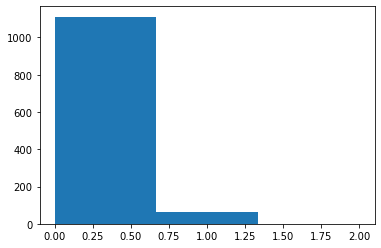

In [150]:
plt.hist(binclass_isaura[binclass_isaura.eblob2 > blob2_cut].trackID, bins = 3)

Here we histogram all the tracks energiesfrom all the events

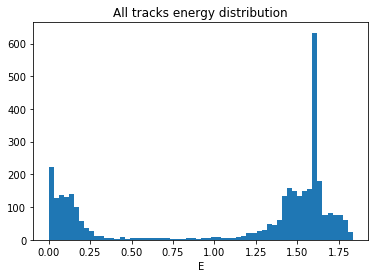

In [131]:
plt.hist(binclass_isaura.energy, bins = 60)
plt.title('All tracks energy distribution')
plt.xlabel('E')
plt.show()

And now, the energies of the tracks from events that have just one track

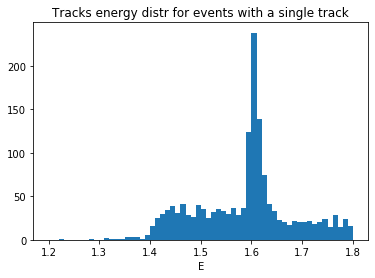

In [128]:
plt.hist(single_track_events.energy, bins = 60, range=[1.2, 1.8])
plt.title('Tracks energy distr for events with a single track')
plt.xlabel('E')
plt.show()

And very similar, the most energetic tracks from each event energy distribution. We can see a bigger tail in the left because of the events that their most energetic track is not that energetic i guess

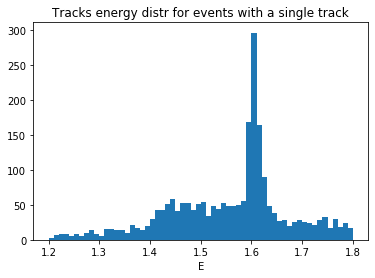

In [129]:
plt.hist(most_energetic_tracks.energy, bins = 60, range=[1.2, 1.8])
plt.title('Most energetic tracks energy distr')
plt.xlabel('E')
plt.show()

Supongo q la población en trazas pequeñas son trazas que salen de la reconstrucción de beersheba... es decir no son muy útiles, pero el corte que estoy haciendo es en EVENTOS q tengan solo una traza, no es q haya un evento y coja solo la primera traza..... en fin (voy a probar esta segunda opcion, es simplemente tomar los que tengan traza id = 0)

Quizás tiene más sentido coger las de traza id = 0 PORQUE así siempre coges las de single track y además tb coges muchos casos en los que quizás hay alguna traza espuria de la reconstrucción q se etiqueta como fantasma y punto...

Además, para comparar con mi labelling supongo que haré eso tb.. aunqeu fijo que si hago el corte en energías de blob 2 las trazas que no son la traza 0 dan como q tienen unsolo blob... al menos en su mayoria

In [134]:
most_energetic_tracks[most_energetic_tracks.eblob2 > blob2_cut]

,dataset_id,event,trackID,energy,length,numb_of_voxels,numb_of_hits,numb_of_tracks,x_min,y_min,...,blob2_x,blob2_y,blob2_z,eblob1,eblob2,ovlp_blob_energy,vox_size_x,vox_size_y,vox_size_z,binclass
0,0,100000050,0,1.431453,83.407169,23,3437,2,-22.5,50.5,...,24.650485,66.307430,348.010709,0.796947,0.411878,0.000000,15.0,15.0,15.0,0
2,1,100000051,0,1.632143,62.193966,24,3368,1,-37.5,33.5,...,0.483401,81.464169,94.413664,0.467121,0.351439,0.000000,15.0,15.0,15.0,0
6,4,100000054,0,1.608891,98.407169,19,3600,1,84.5,109.5,...,102.266452,139.487426,347.878971,0.593266,0.537392,0.000000,15.0,15.0,15.0,1
7,5,100000055,0,1.614513,62.193966,23,3334,1,3.5,107.5,...,45.337130,150.040916,168.595554,0.539249,0.445584,0.000000,15.0,15.0,15.0,1
8,6,100000056,0,1.605118,66.961524,15,3454,1,64.5,-2.5,...,75.856432,32.101323,185.651159,0.833312,0.535519,0.000000,15.0,15.0,15.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3463,2405,100000581,0,1.603960,88.174728,22,3423,1,-40.5,9.5,...,-32.529716,17.725911,317.262515,0.634739,0.620029,0.000000,15.0,15.0,15.0,1
3466,2407,100000583,0,1.443112,73.174728,25,2677,1,-64.5,103.5,...,-22.836380,152.020719,130.724850,0.747412,0.397221,0.000000,15.0,15.0,15.0,1
3475,2414,100000590,0,1.604459,130.601135,26,4018,1,-85.5,89.5,...,-20.990504,154.308815,373.770392,0.567754,0.274593,0.000000,15.0,15.0,15.0,1
3476,2415,100000591,0,1.605224,47.193966,14,3196,1,89.5,34.5,...,108.273210,61.505816,301.713504,1.015166,0.608395,0.071846,15.0,15.0,15.0,0


In [137]:
single_track_events[(single_track_events.eblob2 > blob2_cut)]

,dataset_id,event,trackID,energy,length,numb_of_voxels,numb_of_hits,numb_of_tracks,x_min,y_min,...,blob2_x,blob2_y,blob2_z,eblob1,eblob2,ovlp_blob_energy,vox_size_x,vox_size_y,vox_size_z,binclass
2,1,100000051,0,1.632143,62.193966,24,3368,1,-37.5,33.5,...,0.483401,81.464169,94.413664,0.467121,0.351439,0.000000,15.0,15.0,15.0,0
6,4,100000054,0,1.608891,98.407169,19,3600,1,84.5,109.5,...,102.266452,139.487426,347.878971,0.593266,0.537392,0.000000,15.0,15.0,15.0,1
7,5,100000055,0,1.614513,62.193966,23,3334,1,3.5,107.5,...,45.337130,150.040916,168.595554,0.539249,0.445584,0.000000,15.0,15.0,15.0,1
8,6,100000056,0,1.605118,66.961524,15,3454,1,64.5,-2.5,...,75.856432,32.101323,185.651159,0.833312,0.535519,0.000000,15.0,15.0,15.0,1
9,7,100000057,0,1.599784,96.961524,25,3845,1,-48.5,-8.5,...,-19.758345,66.741437,465.796839,0.595896,0.448568,0.000000,15.0,15.0,15.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3461,2403,100000579,0,1.794695,113.407169,24,3813,1,-104.5,45.5,...,-29.364047,64.012556,279.178743,0.320135,0.281855,0.000000,15.0,15.0,15.0,0
3463,2405,100000581,0,1.603960,88.174728,22,3423,1,-40.5,9.5,...,-32.529716,17.725911,317.262515,0.634739,0.620029,0.000000,15.0,15.0,15.0,1
3466,2407,100000583,0,1.443112,73.174728,25,2677,1,-64.5,103.5,...,-22.836380,152.020719,130.724850,0.747412,0.397221,0.000000,15.0,15.0,15.0,1
3475,2414,100000590,0,1.604459,130.601135,26,4018,1,-85.5,89.5,...,-20.990504,154.308815,373.770392,0.567754,0.274593,0.000000,15.0,15.0,15.0,1


In [130]:
def hit_data_cuts_event(hits, bins, Rmax = np.nan, coords = ['x', 'y', 'z'], identifyer = 'dataset_id'):
    '''
    This function performs the fiducial and boundary cuts to the input hits.
    Args:
        hits: DATAFRAME
    Contains the hits information.
        bins: LIST OF ARRAYS
    Contains the desired bins in each coordinate.
        Rmax: NaN OR FLOAT
    Value to perform the fiducial cut of the hits. If NaN, the cut is not done.
        coords: LIST
    Title of the columns for the coordinates.
    RETURNS:
        hits_cut: DATAFRAME
    The same dataframe with the cut performed on the hits.
    
        hits_del: DATAFRAME
    Hits that were substracted from the initial hits because of the cut.
    
        hits_del_event: DATAFRAME
    The dataframe with only the events that pass the cut.
    '''

    #Creo el boundary cut (elimina hits fuera del tamaño del detector deseado)
    binsX, binsY, binsZ = bins
    boundary_cut = (hits[coords[0]]>=binsX.min()) & (hits[coords[0]]<=binsX.max())\
                 & (hits[coords[1]]>=binsY.min()) & (hits[coords[1]]<=binsY.max())\
                 & (hits[coords[2]]>=binsZ.min()) & (hits[coords[2]]<=binsZ.max())

    #Creo el fiducial cut (toma los hits dentro de cierto radio)
    if np.isnan(Rmax):
        fiducial_cut = pd.Series(np.ones(len(hits), dtype=bool)) #creates a mask with all trues
    else:
        fiducial_cut = (hits[coords[0]]**2+hits[coords[1]]**2)<Rmax**2
    
    
    #Finalmente escojo dichos hits
    hits_cut = hits[boundary_cut & fiducial_cut].reset_index(drop = True)
    
    #Y los hits eliminados
    hits_del = hits[~(boundary_cut & fiducial_cut)]
    
    #Y hago el df eliminando todos los hits de eventos que tengan algún hit fuera
    del_events = hits_del[identifyer].unique()
    hits_del_event = hits.copy()
    for i in del_events:
        hits_del_event = hits_del_event[~(hits_del_event.dataset_id == i)]
    assert len(del_events) + len(hits_del_event[identifyer].unique()) == len(hits[identifyer].unique())
    return hits_cut, hits_del, hits_del_event